In [124]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
from matplotlib import pyplot as plt


sys.path.insert(0, "..") 
from src.data import make_dataset
from src.features import build_features
from src.visualization import visualize

pd.set_option("display.precision", 5)
pd.set_option("display.max.columns", None)
pd.options.display.float_format = '{:6.5f}'.format

import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Bonds

In dit onderzoek is uitgegaan van een beperkte set bonds. Het is nog onduidelijk of de data van verlopen bonds ook zinvol is voor het onderzoek. Een bond is typisch maar kort in portefeuille waardoor we geen lange tijdreeksen hebben van een bepaalde bond. Mogelijk komt de bond wel erg over een met andere bonds die we in het verleden hebben gehad en zegt het koerstverloop van die bonds iets over het koersverloop van de huidige bonds. Mogelijk spelen benchmark bonds hier een rol bij. 

In [126]:
df_bonds = make_dataset.read_pkl('bonds')

2022-01-16 14:44:24.798 | INFO     | src.data.make_dataset:read_pkl:382 - Load preprocessed bonds data


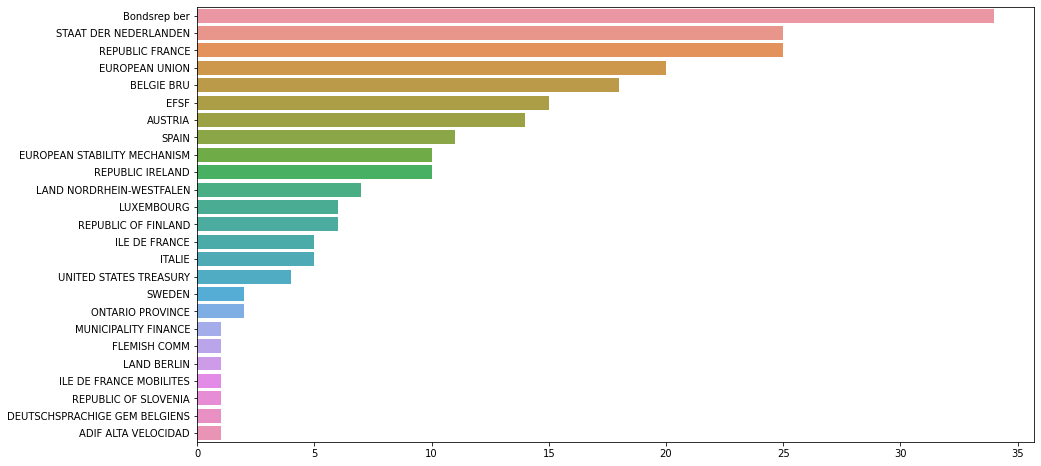

In [127]:
plt.figure(figsize=(15,8))
visualize.countplot(data = df_bonds, x = 'issuer_name')

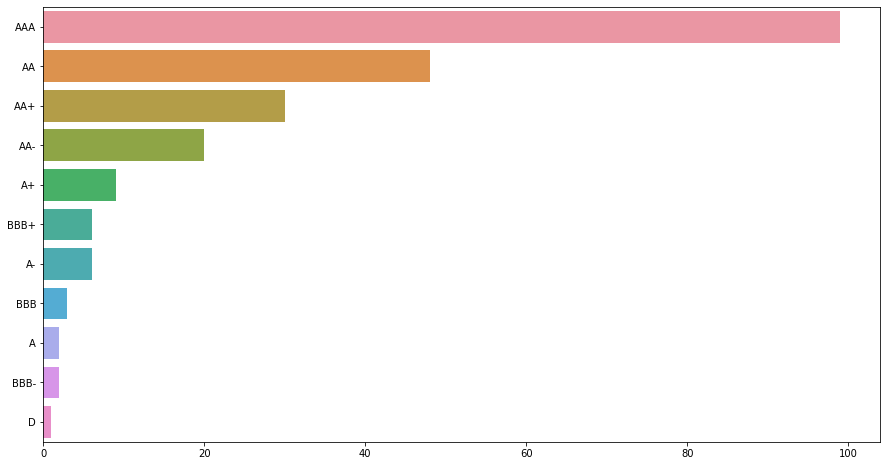

In [128]:
plt.figure(figsize=(15,8))
visualize.countplot(data = df_bonds, x = 'issue_rating')

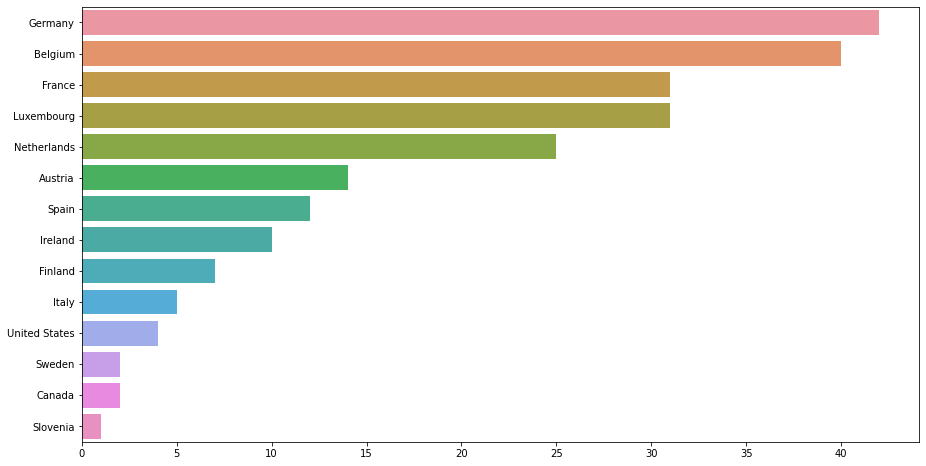

In [129]:
plt.figure(figsize=(15,8))
visualize.countplot(data = df_bonds, x = 'country')

Bond prices

In [130]:
df_price = make_dataset.read_pkl('price')
df_price.head()

2022-01-16 14:44:34.250 | INFO     | src.data.make_dataset:read_pkl:382 - Load preprocessed price data


,reference_identifier,ccy,rate_dt,mid,lastday
0,DE0001135143,EUR,2010-12-17,136.76000,2010-12-31
1,NL0000102275,EUR,2010-12-17,103.39000,2010-12-31
2,DE0001135424,EUR,2010-12-17,95.45300,2010-12-31
3,NL0009446418,EUR,2010-12-17,102.69000,2010-12-31
4,NL0000102234,EUR,2010-12-17,106.22000,2010-12-31


Voor het onderzoek richten we ons in eerste instantie op Nederlandse staatsobligaties met een looptijd van 10 jaar. Voor bijna ieder jaar is er een uitgifte van een 10 jaars vastrente obligatie. Wanneer we kijken naar bonds met een zelfde looptijd, en zelfde issuer, dan zien we dat de term spread langzaam afneemt. Naar mate de maturity dichterbij komt wordt de prijs steeds meer bepaald door de resterende looptijd.

In [132]:
df_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223950 entries, 0 to 223949
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reference_identifier  223950 non-null  string        
 1   ccy                   223950 non-null  string        
 2   rate_dt               223950 non-null  datetime64[ns]
 3   mid                   223950 non-null  float64       
 4   lastday               223950 non-null  object        
 5   country               223950 non-null  string        
 6   bond_ext_name         223950 non-null  object        
 7   issue_dt              223950 non-null  datetime64[ns]
 8   first_coupon_date     223950 non-null  datetime64[ns]
 9   mature_dt             223950 non-null  datetime64[ns]
 10  isin                  223950 non-null  string        
 11  issuer_name           223950 non-null  string        
 12  coupon_frq            223950 non-null  string        
 13 

In [134]:
df_bp.loc[( df_bp['bond_duration'] > 3650 ) & ( df_bp['bond_duration'] < 3660 )]

,reference_identifier,ccy,rate_dt,mid,lastday,country,bond_ext_name,issue_dt,first_coupon_date,mature_dt,isin,issuer_name,coupon_frq,coupon,tot_issue,cfi_code,issue_rating,bond_duration,remain_duration
7500,DE0001135499,EUR,2012-09-14,98.13800,2012-12-31,Germany,DBR 1.5% 12-2022,2012-09-04,2013-09-04,2022-09-04,DE0001135499,Bondsrep ber,ANNUAL,1.50000,5000.00000,DBFTFB,AAA,3652,3642
7525,DE0001135499,EUR,2012-09-17,98.33200,2012-12-31,Germany,DBR 1.5% 12-2022,2012-09-04,2013-09-04,2022-09-04,DE0001135499,Bondsrep ber,ANNUAL,1.50000,5000.00000,DBFTFB,AAA,3652,3639
7550,DE0001135499,EUR,2012-09-18,98.80600,2012-12-31,Germany,DBR 1.5% 12-2022,2012-09-04,2013-09-04,2022-09-04,DE0001135499,Bondsrep ber,ANNUAL,1.50000,5000.00000,DBFTFB,AAA,3652,3638
7575,DE0001135499,EUR,2012-09-25,99.40100,2012-12-31,Germany,DBR 1.5% 12-2022,2012-09-04,2013-09-04,2022-09-04,DE0001135499,Bondsrep ber,ANNUAL,1.50000,5000.00000,DBFTFB,AAA,3652,3631
7600,DE0001135499,EUR,2012-09-26,100.41500,2012-12-31,Germany,DBR 1.5% 12-2022,2012-09-04,2013-09-04,2022-09-04,DE0001135499,Bondsrep ber,ANNUAL,1.50000,5000.00000,DBFTFB,AAA,3652,3630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223925,LU2162831981,EUR,2022-01-07,98.88300,2022-12-31,Luxembourg,LUXEMBOURG 0% 20-2030,2020-04-28,2020-04-28,2030-04-28,LU2162831981,LUXEMBOURG,ANNUAL,0.00000,1000.00000,DBZUFB,AAA,3652,3033
223926,LU2320463339,EUR,2022-01-07,98.17200,2022-12-31,Luxembourg,LUXEMBOURG 0% 21-2031,2021-03-24,2021-03-24,2031-03-24,LU2320463339,LUXEMBOURG,ANNUAL,0.00000,2500.00000,DBZUFB,AAA,3652,3363
223946,SI0002104196,EUR,2022-01-07,97.52500,2022-12-31,Slovenia,SLOVENIA 0.125% 21-2031,2021-07-01,2021-07-01,2031-07-01,SI0002104196,REPUBLIC OF SLOVENIA,ANNUAL,0.12500,1000.00000,DBFTFR,A,3652,3462
223948,XS2262263622,EUR,2022-01-07,95.94500,2022-12-31,Canada,ONTARIO 0.01% 20-2030,2020-11-24,2021-11-25,2030-11-25,XS2262263622,ONTARIO PROVINCE,ANNUAL,0.01000,2500.00000,DTFNFB,AA-,3653,3244


2022-01-16 14:49:10.557 | INFO     | src.data.make_dataset:read_pkl:382 - Load preprocessed bp data


<AxesSubplot:xlabel='rate_dt', ylabel='mid'>

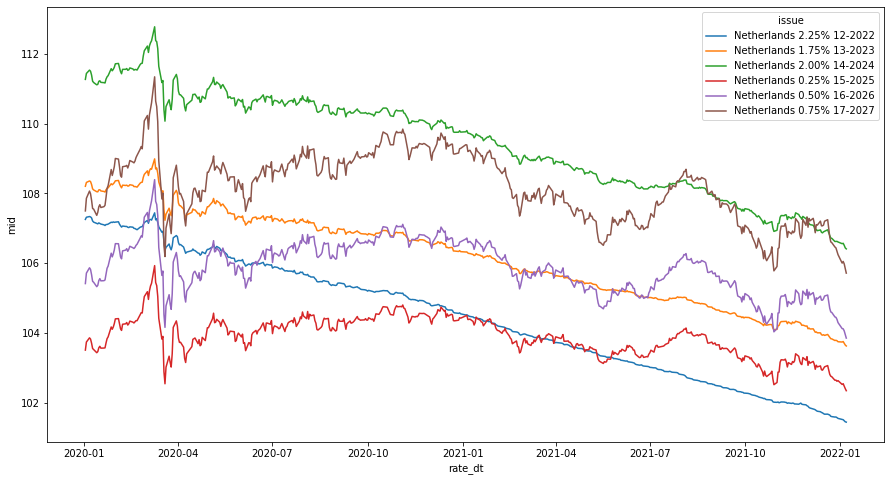

In [140]:
# isin = "DE0001102374" # 10 Years NL Bond, maturity 2025 0.5% coupon
import datetime 
df_bp = make_dataset.read_pkl('bp')

df_bp_10y = df_bp.loc[( df_bp['bond_duration'] > 3650 ) & ( df_bp['bond_duration'] < 4000 )]
df_bp_10y = df_bp_10y.sort_values( by = ['country','mature_dt'] )

filter =    ( df_bp_10y['country'] == 'Netherlands' ) & \
            ( df_bp_10y['coupon'] > 0 ) & \
            ( df_bp_10y['mature_dt'] > '1-jan-2022' ) & \
            ( df_bp_10y['mature_dt'] < '1-jan-2028' ) & \
            ( df_bp_10y['rate_dt'] > '1-jan-2020' )       
df_nl_10y = df_bp_10y.loc[filter]

df_nl_10y['issue'] = df_nl_10y['country']  + ' ' + df_nl_10y['bond_ext_name'].str.upper().str.split(n=1).str[1]

plt.figure(figsize=(15,8))
sns.lineplot(data = df_nl_10y, x = 'rate_dt', y = 'mid', hue = 'issue')


Wanneer we naar de relatie kijken tussen de bond prijs, en de resterende looptijd, zien we dit effect waarbij de prijs de laatste 5 jaar ongeveer gelijkmatig terugloopt naar 100 wanneer eindelooptijd dichterbij komt.

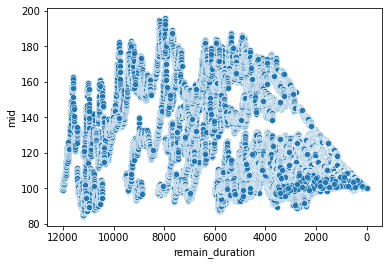

In [147]:

ax = sns.scatterplot(data = df_bp, x = 'remain_duration', y = 'mid')
ax.invert_xaxis()

wanneer we kijken naar de relatie tussen de coupon hoogte en de prijs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223950 entries, 0 to 223949
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reference_identifier  223950 non-null  string        
 1   ccy                   223950 non-null  string        
 2   rate_dt               223950 non-null  datetime64[ns]
 3   mid                   223950 non-null  float64       
 4   lastday               223950 non-null  object        
 5   country               223950 non-null  string        
 6   bond_ext_name         223950 non-null  object        
 7   issue_dt              223950 non-null  datetime64[ns]
 8   first_coupon_date     223950 non-null  datetime64[ns]
 9   mature_dt             223950 non-null  datetime64[ns]
 10  isin                  223950 non-null  string        
 11  issuer_name           223950 non-null  string        
 12  coupon_frq            223950 non-null  string        
 13 

<AxesSubplot:xlabel='bins', ylabel='mid'>

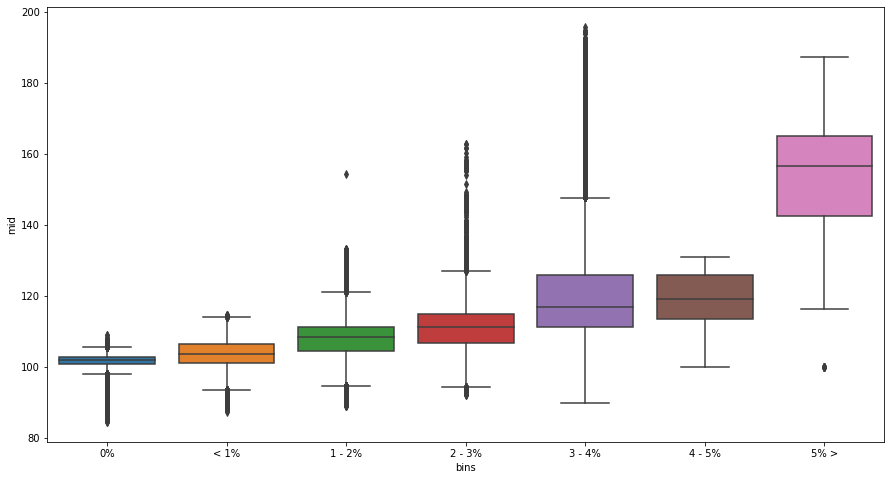

In [175]:
plt.figure(figsize=(15,8))

df_bp =df_bp.assign(bins = pd.cut(df_bp["coupon"], [-1,0.001,1,2,3,4,5,10], 
                        labels=['0%', '< 1%', '1 - 2%','2 - 3%', '3 - 4%','4 - 5%', '5% >']))
sns.boxplot(data = df_bp, x= 'bins', y = 'mid')

We kunnen ook bonds vergelijken met een zelfde resterende looptijd. Het koersverloop wordt dan verklaard door het kredietrisico van de issuer en de coupon rente. 

<AxesSubplot:xlabel='rate_dt', ylabel='mid'>

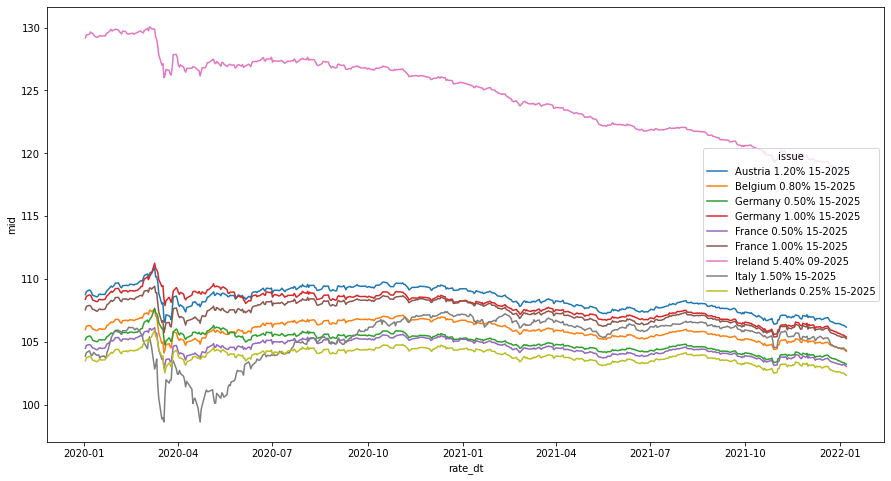

In [108]:

df_mature_2025 = df_bp.loc[( df_bp['mature_dt'].dt.year == 2025 )]
filter =    ( df_mature_2025['coupon'] > 0 ) & \
            ( df_bp_10y['rate_dt'] > '1-jan-2020' )                            
df_mature_2025 = df_mature_2025.loc[filter]
df_mature_2025['issue'] = df_mature_2025['country'] + ' ' + df_mature_2025['bond_ext_name'].str.split(n=1).str[1]
plt.figure(figsize=(15,8))
sns.lineplot(data = df_mature_2025, x = 'rate_dt', y = 'mid', hue = 'issue')

2022-01-12 15:15:43.550 | INFO     | src.data.make_dataset:read_pkl:377 - Load preprocessed bp data
2022-01-12 15:15:43.713 | INFO     | src.data.make_dataset:read_pkl:377 - Load preprocessed yield data


<AxesSubplot:xlabel='rate_dt', ylabel='mid'>

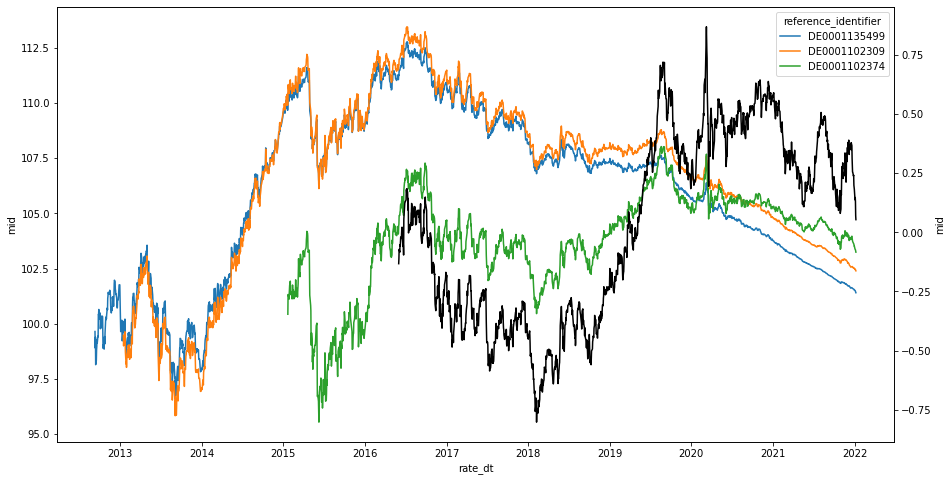

In [9]:
#df = make_dataset.join_bond_data(df_bonds,df_price,['DE0001102309','DE0001102374', 'DE0001135499']) # Example 3 German Bonds 10 Years
plt.figure(figsize=(15,8))
df_bp = make_dataset.read_pkl('bp')

df_yield = make_dataset.read_pkl('yield')
df_y10 = df_yield[df_yield['timeband']=='10 YEARS']
df_y10_germany = df_y10[df_y10['country']=='Germany']


df = df_bp[df_bp['isin'].isin(['DE0001102309','DE0001102374', 'DE0001135499'])]
df = df[df['rate_dt'] >= df_y10_germany['rate_dt'].min()]
sns.lineplot(data = df, x = 'rate_dt', y = 'mid', hue = 'reference_identifier')

df_y10_germany = df_y10_germany[df_y10_germany['rate_dt'] >= df['rate_dt'].min()]
df_y10_germany['mid'] = df_y10_germany['mid'] * -1
ax2 = plt.twinx()
sns.lineplot(data = df_y10_germany, x = 'rate_dt', y = 'mid', color = 'black', ax=ax2)


In [12]:
df_bonds_i = df_bonds[( df_bonds['country'] == 'Italy' ) & (df_bonds['issue_dt'] <= '1-jan-2018')  & (df_bonds['mature_dt'] >= '1-jan-2022')]
df_bonds_i

,ccy,country,issue_dt,first_coupon_date,mature_dt,isin,issuer_name,coupon_frq,coupon,tot_issue,cfi_code,issue_rating,bond_duration
24,EUR,Italy,2015-03-02,2015-06-01,2025-06-01,IT0005090318,ITALIE,SEMI ANNUAL,1.50000,19786.72000,DBFUFB,BBB-,3744 days
84,EUR,Italy,2016-03-01,2016-06-01,2026-06-01,IT0005170839,ITALIE,SEMI ANNUAL,1.60000,16249.50000,DBFUFB,BBB-,3744 days


<AxesSubplot:xlabel='rate_dt', ylabel='mid'>

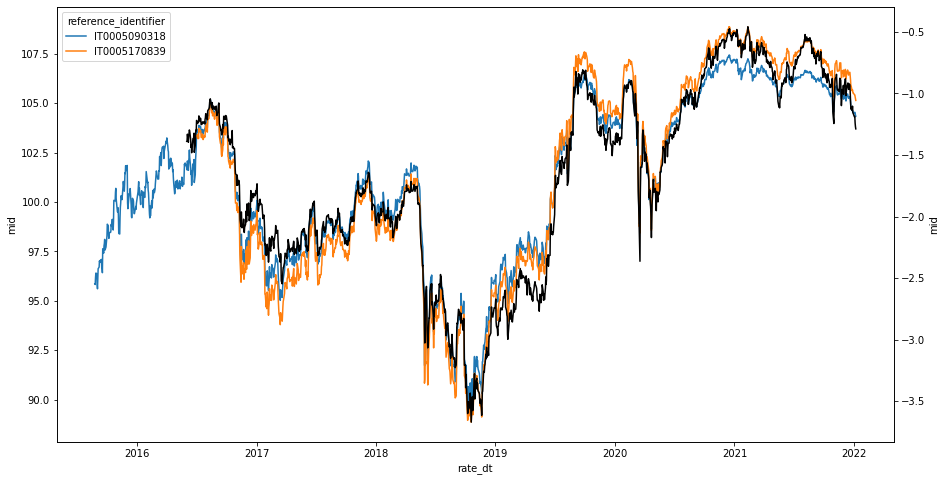

In [13]:
isins = df_bonds_i['isin'].to_list()
df_bp_i = df_bp[df_bp['isin'].isin(isins)]
plt.figure(figsize=(15,8))
sns.lineplot(data = df_bp_i, x = 'rate_dt', y = 'mid', hue = 'reference_identifier')

df_y10_italy = df_y10[df_y10['country']=='Italy']
df_y10_italy = df_y10_italy[df_y10_italy['rate_dt'] >= df_bp_i['rate_dt'].min()]
df_y10_italy['mid'] = df_y10_italy['mid'] * -1
ax2 = plt.twinx()
sns.lineplot(data = df_y10_italy, x = 'rate_dt', y = 'mid', color = 'black', ax=ax2)

# Yield Curve

De yield curve wordt samengesteld door de prijzen van government bonds te vergelijken en te projecteren. Een van de features die vanuit de literatuur wordt aangedragen is de 'term spread'. Dit is het verschil tussen korte en lange rente. We zien in onderstaand plaatje dat het verschil in korte en langer rente tot 2019 terug liep.


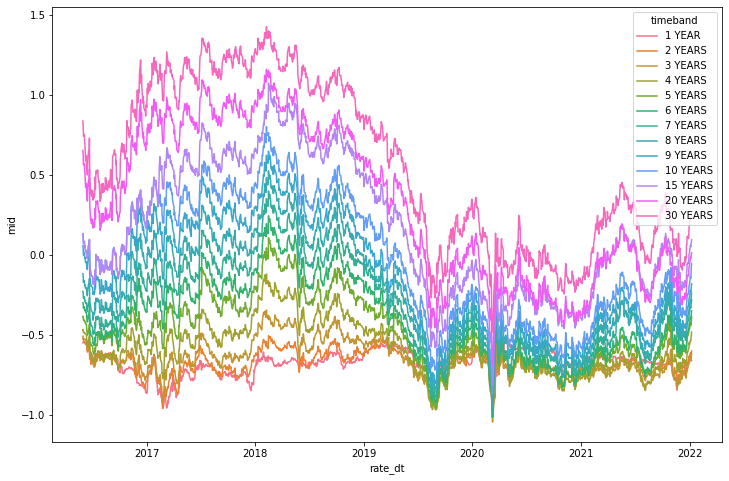

In [17]:
df_yield = make_dataset.read_pkl('yield')
df_yield = df_yield[df_yield['rate_dt'] > '1-jan-2010']

country = 'Germany'
df_country = df_yield[df_yield['country']==country]

plt.figure(figsize=(12, 8))
hue_order = sorted(df_country['timeband'].unique(), key = lambda x: int(x[0:2]))
ax = sns.lineplot(data = df_country, x = 'rate_dt', y = 'mid', hue = 'timeband', hue_order=hue_order)

Credit Spread

Inflation

De rente is theoretisch gecorreleerd aan de inflatie verwachting. In de praktijk is deze correlatie niet altijd evident. Ook is het niet duidelijk of de bondprijzen worden gevormd door de lnflatieverwachting, of omgekeerd de inflatie wordt afgeleid uit stijgende prijzen voor staatsobligaties.

In [27]:
df_inflation['country'].unique()

<StringArray>
['Germany', 'France', 'Spain', 'Italy', 'United States']
Length: 5, dtype: string

2022-01-12 15:25:21.619 | INFO     | src.data.make_dataset:read_pkl:377 - Load preprocessed inflation data


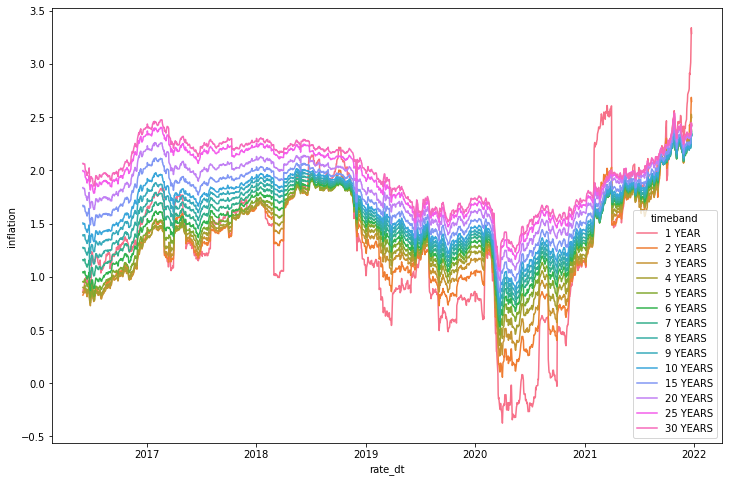

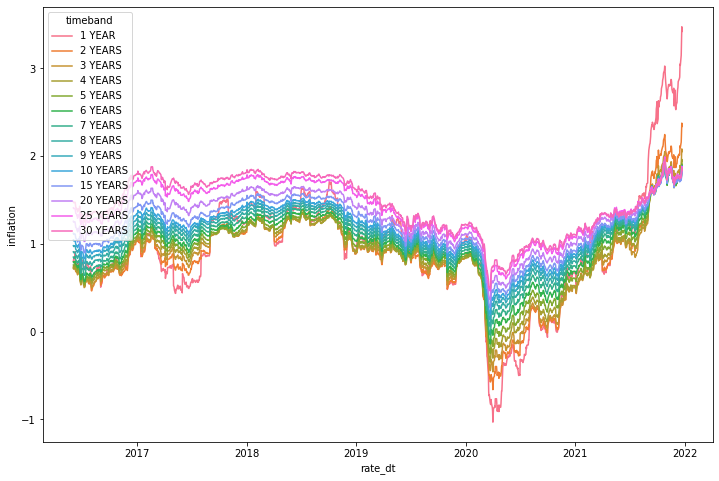

In [29]:

df_inflation = make_dataset.read_pkl('inflation')
df_inflation = df_inflation[df_inflation['rate_dt'] > df_yield['rate_dt'].min()]

country = 'Germany'
df_country = df_inflation[df_inflation['country']==country]

plt.figure(figsize=(12, 8))
hue_order = sorted(df_country['timeband'].unique(), key = lambda x: int(x[0:2]))
ax = sns.lineplot(data = df_country, x = 'rate_dt', y = 'inflation', hue = 'timeband', hue_order=hue_order)

country = 'Italy'
df_country = df_inflation[df_inflation['country']==country]

plt.figure(figsize=(12, 8))
hue_order = sorted(df_country['timeband'].unique(), key = lambda x: int(x[0:2]))
ax = sns.lineplot(data = df_country, x = 'rate_dt', y = 'inflation', hue = 'timeband', hue_order=hue_order)

Inflation should be negatively correlated to the bond price